<a href="https://colab.research.google.com/github/canalrafael/Pre-Doc/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This notebook aims to visually understand how gradient descent works

In [ ]:
import torch
import time
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

torch.Size([100, 1])
torch.Size([100, 1])


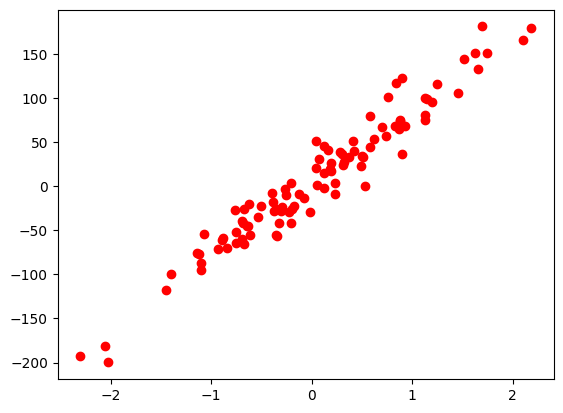

In [ ]:
# DATA
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

print(x.shape)
print(y.shape)

plt.plot(x_numpy, y_numpy, 'ro')

In [ ]:
# MODEL
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

In [ ]:
# COST FUNCTION AND OPTIMIZER
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print (model.parameters())

<generator object Module.parameters at 0x7cdc24c44970>


Epoch:  9
Custo: 4448.33300781250000000000
Coeficientes: 
m: 11.64588165283203125000
m (gradiente): -113.69953155517578125000
b: 1.02578151226043701172
b (gradiente): -15.07905006408691406250


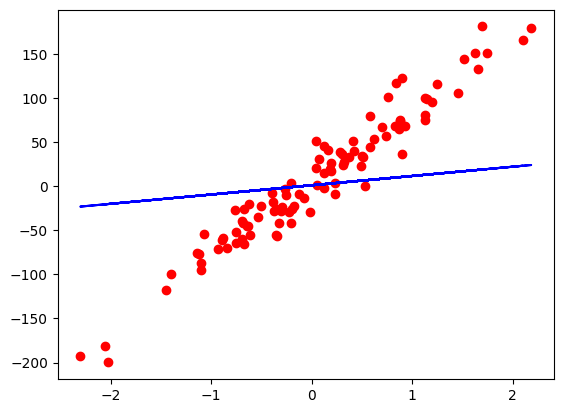

Epoch:  19
Custo: 3316.02905273437500000000
Coeficientes: 
m: 22.06761169433593750000
m (gradiente): -96.86685943603515625000
b: 2.30934500694274902344
b (gradiente): -11.15019416809082031250


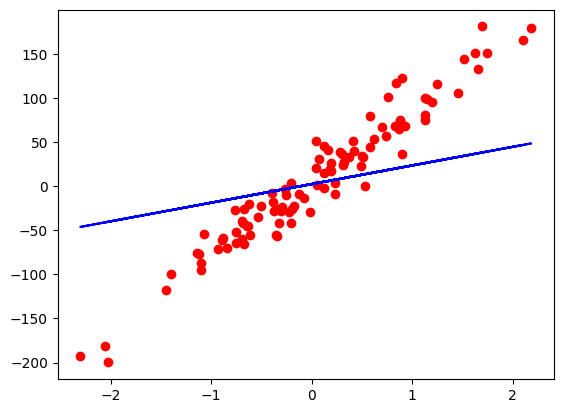

Epoch:  29
Custo: 2497.24975585937500000000
Coeficientes: 
m: 30.94747161865234375000
m (gradiente): -82.54366302490234375000
b: 3.25081682205200195312
b (gradiente): -8.11322212219238281250


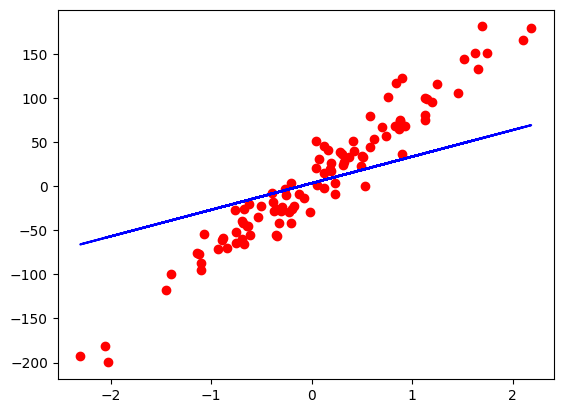

Epoch:  39
Custo: 1904.52502441406250000000
Coeficientes: 
m: 38.51514053344726562500
m (gradiente): -70.35266113281250000000
b: 3.92864012718200683594
b (gradiente): -5.77918148040771484375


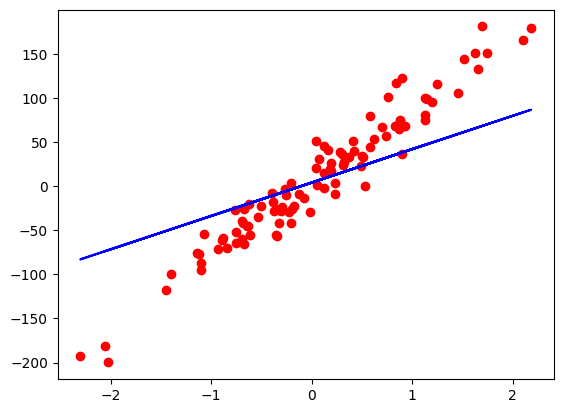

Epoch:  49
Custo: 1475.00207519531250000000
Coeficientes: 
m: 44.96580886840820312500
m (gradiente): -59.97388458251953125000
b: 4.40454721450805664062
b (gradiente): -3.99756121635437011719


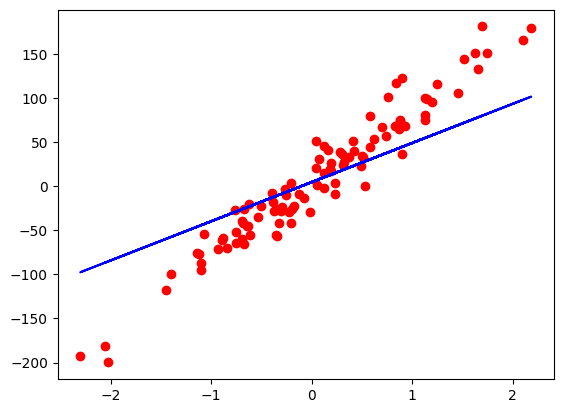

Epoch:  59
Custo: 1163.44677734375000000000
Coeficientes: 
m: 50.46540069580078125000
m (gradiente): -51.13578796386718750000
b: 4.72696971893310546875
b (gradiente): -2.64866852760314941406


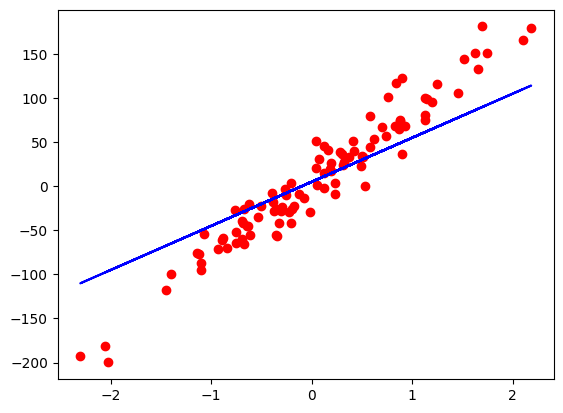

Epoch:  69
Custo: 937.26086425781250000000
Coeficientes: 
m: 55.15499877929687500000
m (gradiente): -43.60794830322265625000
b: 4.93377304077148437500
b (gradiente): -1.63749921321868896484


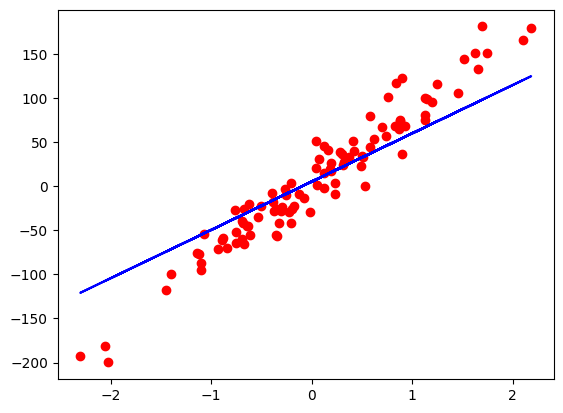

Epoch:  79
Custo: 772.91906738281250000000
Coeficientes: 
m: 59.15459060668945312500
m (gradiente): -37.19472122192382812500
b: 5.05444526672363281250
b (gradiente): -0.88879454135894775391


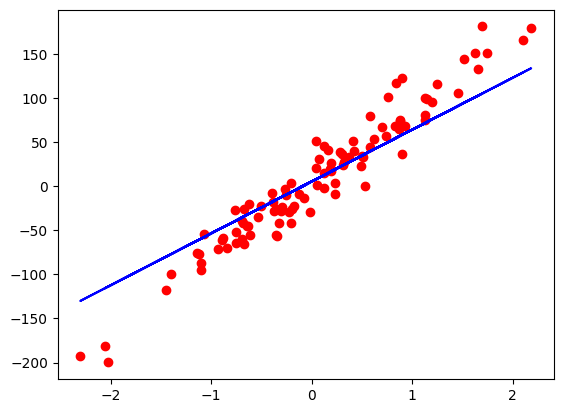

Epoch:  89
Custo: 653.42181396484375000000
Coeficientes: 
m: 62.56629180908203125000
m (gradiente): -31.72989463806152343750
b: 5.11184644699096679688
b (gradiente): -0.34307634830474853516


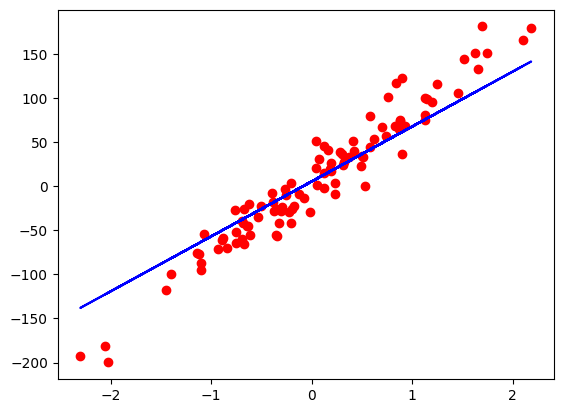

Epoch:  99
Custo: 566.47296142578125000000
Coeficientes: 
m: 65.47697448730468750000
m (gradiente): -27.07224655151367187500
b: 5.12360286712646484375
b (gradiente): 0.04654955863952636719


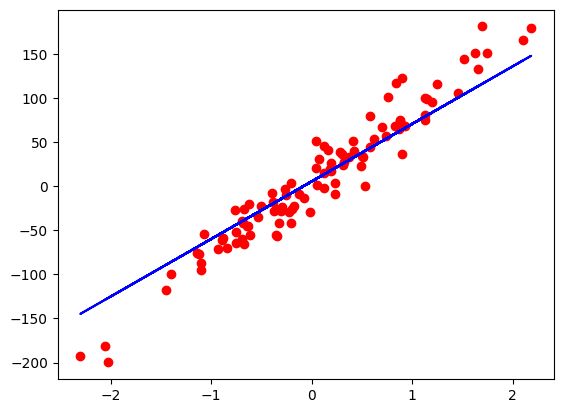

In [ ]:
# TRAINING LOOP
num_iterations = 100
contador_custo = []
for epoch in range(num_iterations):
  #forward pass and loos
  y_hat = model(x)
  loss = criterion(y_hat, y)
  contador_custo.append(loss)

  #backward pass (calculed grad)
  loss.backward()

  #update (update weight)
  optimizer.step()

  if (epoch+1)%10 == 0:
      print('Epoch: ', epoch)
      print('Custo: {:.20f}'.format(loss.item()))
      print('Coeficientes: ')
      print('m: {:.20f}'.format(model.weight.data.detach().item()))
      print('m (gradiente): {:.20f}'.format(model.weight.grad.detach().item()))
      print('b: {:.20f}'.format(model.bias.data.detach().item()))
      print('b (gradiente): {:.20f}'.format(model.bias.grad.detach().item()))
      previsao_final = y_hat.detach().numpy()
      plt.plot(x_numpy, y_numpy, 'ro')
      plt.plot(x_numpy, previsao_final, 'b')
      plt.show()

  #clean optimizer
  optimizer.zero_grad()